In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
fn = "../numerical_sims/Assymetric_Resonator_Loading_Only_Microstrip.csv"
zparamdata = np.loadtxt(fn, delimiter=',', skiprows=2)

In [3]:
MHz = 1e6
nH = 1e-9
pF = 1e-12
um = 1e-6

In [4]:
frequency = zparamdata[:, 0][100:]  
Z11 = (zparamdata[:,1] + 1j * zparamdata[:,2])[100:]  
Z12 = (zparamdata[:,3] + 1j * zparamdata[:,4])[100:] 
Z21 = (zparamdata[:,5] + 1j * zparamdata[:,6])[100:]  
Z22 = (zparamdata[:,7] + 1j * zparamdata[:,8])[100:]  

In [5]:
omega = 2*np.pi*frequency *MHz

In [6]:
get_L = lambda w, Z: (Z.imag/w)/nH
get_C = lambda w, Z: 1/(-Z.imag*w)/pF

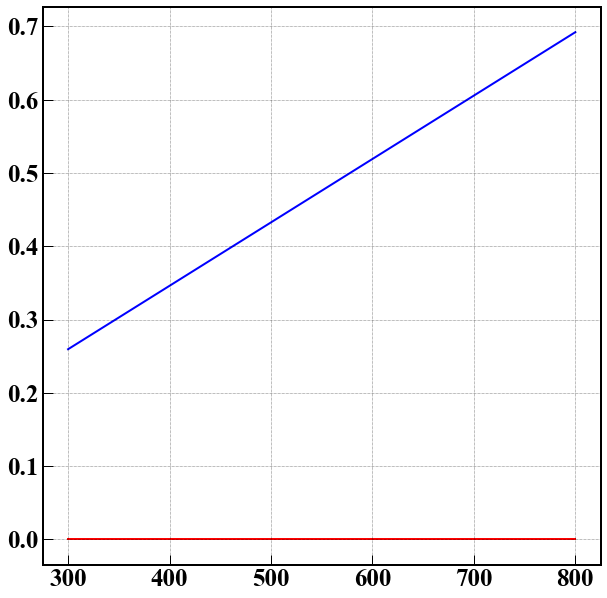

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(frequency, (Z11 - Z21).real, 'r')
ax.plot(frequency, (Z11 - Z21).imag, 'b')
ax.grid();

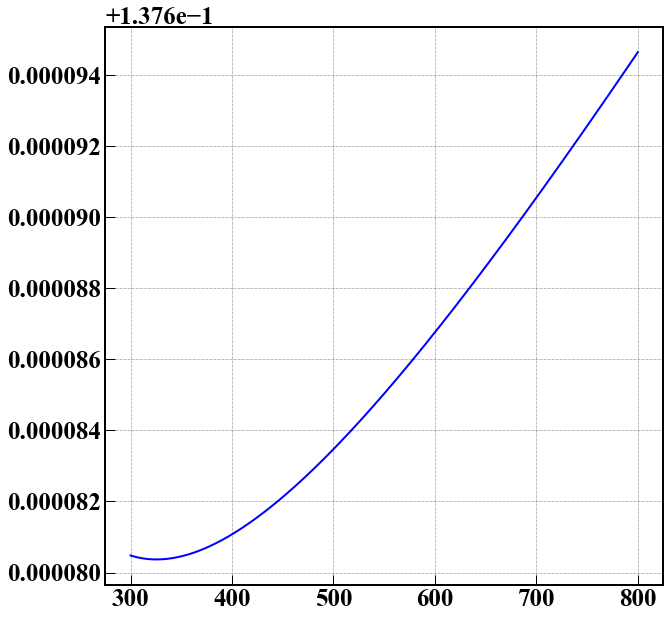

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.plot(frequency, get_L(omega, Z11 - Z21) , 'r')
ax.plot(frequency, get_L(omega, Z22 - Z21) , 'b')
ax.grid();

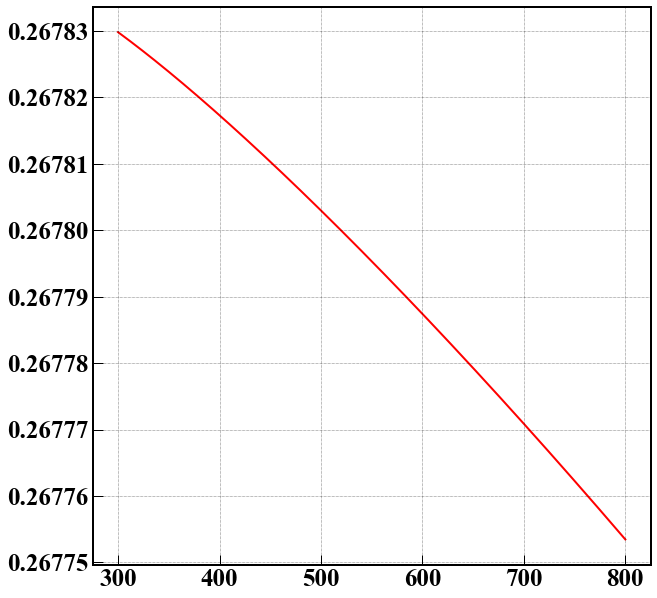

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(frequency, get_C(omega, Z21) , 'r')
ax.grid();

In [14]:
x1 = 524#*um
x2 = 476#*um
L1 = np.average(get_L(omega, Z11 - Z21))
L2 = np.average(get_L(omega, Z22 - Z21))

print(L1/x1)
print(L2/x2)

0.0004460072132546691
0.0004382881563295331


In [15]:
4*np.pi

12.566370614359172

In [16]:
126/9

14.0

In [17]:
14**0.5

3.7416573867739413

In [10]:
np.average(get_C(omega, Z21))

0.4164475097058821